<a href="https://colab.research.google.com/github/RongyiDai/Data-Project/blob/master/Amy_Dai_ComputationalProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Project 2: Linear Regression

In this project, our goals are 
+ to understand the linear algebra behind linear regression (projections; least squares)
+ to apply linear regression to real datasets (large!)


Please refer to the [Lecture 6 demonstration](https://colab.research.google.com/drive/15hcR--leZTtidWdZqDFJI8E6WwvLl_fB) for reference on matrix computation with python.

This project is due on Friday April 12 at 9am EST.

## Background

Given an $m\times n$ matrix $A$ and a vector $\vec b \in \mathbb{R}^m$, the **Least Squares Problem** asks us to find a vector $\widehat x$ such that $A \widehat x$ is as close as possible to the $\vec b$.   That is, to find a vector $\widehat x$ that makes the square of the norm $\lVert A \widehat x - \vec b \rVert$ as small as possible.

**Linear regression**---the problem of fitting a curve through a given set of data points---can be formulated as a least squares problem, by building the appropriate matrix $A$ and vector $\vec b$ from the given data points and based on the desired model (line, curve, etc.).


## Your Project

This project has several parts:
+ **Part 1: Warm-Up**

   In this part, you will be given a small set of data points, similar to what we have worked with in class and in homework problems.  You will fit a line and a curve through these data points.  Instead of doing the matrix computations by hand, however, we will use python.
   
+ **Part 2: Larger Dataset**

   In this part, you will work with a larger dataset.  Conceptually, this part will be identical to Part 2. The main difference is that you will have to work with much larger matrices and vectors.
   
+ **Part 3: Multivariate Linear Regression**

  In this part, you will again work with a small set of data points.  However, instead of working with data that has one input ("$x$") and one output ("$y$"), we will work with "multivariate data": several inputs ("$x_1, x_2, \ldots, x_n$") and one output ("$y$").


### Part Zero: Setup

We will need to use the packages `numpy` and `scipy`.  **In the code cell below, please import them as `np` and `sp`, respectively**.

The package `matplotlib.pyplot` has been imported as `plt`; this package is used to plot curves, so that we can visualize our data and the curves we fit.  ***You do not need to know anything about how this package is used***; the code that plot the curves has already been written and do not need to be modified; you only need to complete the linear algebraic portions.

In [0]:
import numpy as np
import scipy as sp


# Do not modify the code below the line 
#------------------------------------------------------- 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

### Part One: Warm-Up

Linear regression is useful when we are trying to find the relationship between two variables.  For example, suppose that we would like to see if there is a relationship between height ($x$) and weight ($y$).

Below is the height and weight of 5 individuals, where height is in centimeters and weight is in kilograms.

<table>
  <tr>
    <th>Height ($x$)</th>
    <th>Weight ($y$)</th>
  </tr>
  <tr>
    <td>178</td>
    <td>69</td>
  </tr>
  <tr>
    <td>160</td>
    <td>58</td>
  </tr>
  <tr>
    <td>168</td>
    <td>63</td>
  </tr>
  <tr>
    <td>150</td>
    <td>53</td>
  </tr>
  <tr>
    <td>147</td>
    <td>52</td>
  </tr>
</table>





**Your Tasks**
+ **Part 1A: Line of best fit**

   The data points have been plotted, along with an example of a line through the data.  Your task is to find the line that would fit the data best.  The equation for this line would describe weight as a function of height.  (That is, we are using height to predict weight.)
   
   You can type in the matrix A and the vector b that you would be using the in the code cell for Part 1A below.
  
+ **Part 1B: Polynomial curve of best fit**

   The data points have been plotted, along with an example of a parabolic curve through the data.  Your task is to find the polynomial curve that would fit the data best.
   
   You can type in the matrix A and the vector b that you would be using the in the code cell for Part 1B below.
   

+ **Part 1C: Interpretation**

    You will be asked to comment on whether you think the line or the parabolic curve that you found describes well the relationship between the two variables.



#### Part 1A: Line of best fit

[[-29.97710623]
 [  0.5540293 ]]
0.8873626373626506


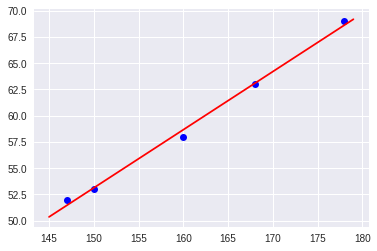

In [0]:
# Your code for Part 1 A: Line of best fit


# Formulate A and b, then solve the least squares problem

A = np.matrix([[1, 178], [1, 160], [1, 168], [1, 150], [1, 147]])
b = np.matrix([[69], [58], [63], [53], [52]])
x = (A.T * A).I * A.T * b
e_1 = (np.linalg.norm(A*x - b)) ** 2
print (x)
print (e_1)



# PLEASE UPDATE the value of c_0 and c_1 below based on the solution you obtained

#  These current values below are just placeholders.
#  As you change the values of c_0 and c_1, the line plotted below also changes.
c_0 = -29.977 # y-intercept 
c_1 = 0.554 # slope


# Do not modify the code below the line 
#-------------------------------------------------------
# Visualizing the data and the regression line
X = [178, 160, 168, 150, 147]
Y = [69, 58, 63, 53, 52]
t = np.arange(145, 180, 1)
Y_line = c_1 * t + c_0
plt.plot( X, Y, 'bo' )
plt.plot( t, Y_line, 'r' )
plt.show( )

#### Part 1B: Polynomial curve of best fit

Please fit a polynomial curve through the same five points.  You can choose to fit a parabola ($y = c_2 x^2 + c_1x + c_0$) or other polynomial curves of higher degrees.  

Since we only have 5 data points, you can choose to fit a polynomial of degree 2, 3, 4, or 5. 


[[ 1.32540671e+03]
 [-2.39440272e+01]
 [ 1.47071049e-01]
 [-2.93305205e-04]
 [ 8.67111703e-17]
 [ 1.36581563e-19]]
3.32806299881145e-05


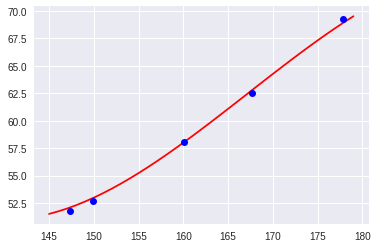

In [0]:
# Your code for Part 1 B: Polynomial Curve of best fit

# Formulate A and b, then solve the least squares problem

A = np.matrix([[1, 178, 178**2, 178**3, 178**4, 178**5],[1, 160, 160**2, 160**3, 160**4, 160**5],[1, 168, 168**2, 168**3, 168**4, 168**5],[1, 150, 150**2, 150**3, 150**4, 150**5],[1, 147, 147**2, 147**3, 147**4, 147**5]])
b = np.matrix([[69],[58],[63],[53],[52]])
x = (A.T * A).I * A.T * b
e_2 = (np.linalg.norm(A*x - b)) ** 2
print (x)
print (e_2)


# PLEASE UPDATE the value of c_0 and c_1 below based on the solution you obtained

#  These current values below are just placeholders.
#  As you change the values of c_i's, the line plotted below also changes.
#  If you are only fitting a polynomial of degree 2, then leave the coefficients
#     of higher degree terms to be 0; etc.
c_0 = 1.32540671e+03 # y-intercept 
c_1 = -2.39440272e+01 # coefficient of x term
c_2 = 1.47071049e-01 # coefficient of x^2 term
c_3 = -2.93305205e-04 # coefficient of x^3 term
c_4 = 8.67111703e-17 # coefficient of x^4 term
c_5 = 1.36581563e-19 # coefficient of x^5 term


# Do not modify the code below the line 
#-------------------------------------------------------
# Visualizing the data and the regression curve
X = [177.80, 160.02, 167.64, 149.86, 147.32]
Y = [69.30, 58.05, 62.55, 52.65, 51.75]
t = np.arange(145, 180, 1)
Y_line = c_5 * (t ** 5) + c_4 * (t ** 4) + c_3 * (t ** 3) + c_2 * (t ** 2) + c_1 * t + c_0
Y_line = Y_line
plt.plot( t, Y_line, 'r' )
plt.plot( X, Y, 'bo' )
plt.show( )

#### Part 1C: Interpretation

Please comment on the best fit line and parabolic curve that you found in Parts 1A and 1B:
+ Does the line you found fit the data relatively well? 
+ Does the curve you found fit the data relatively well?
+ Do you think that the line or the curve you found describes well the relationship between the two variables?

As I printed out the error of the two graphs, e1 = 0.89, e2 = 0.000033, we can tell that the polynomial curve fits the data points much better. While the curve fits well, it doesn't mean that this particular curve best describes the general relationship between weight and height, because the sample size only contains five data points, it is for sure to have a curve with a degree of five to fit with almost no error. Therefore, the curve we generate might only fit for this sample, but cannot be generalized too a larger data size.


### Part Two: A Larger Dataset

The file http://bit.ly/2WqhQhd contains temperature data from 1880 to 2016 (137 data points).  Here, the temperature data has been "normalized" to take a value between -1 and 1.

*(Source: The original data set is from https://datahub.io/core/global-temp)*



**Your Tasks**
+ **Part 2A: Importing the data**

  Run the code cell without any modification.  This code cell simply gets python to get the dataset and store it, so that we can work with it.  Some explanation:
  + The line of code that says `data.head(10)` tells python to display the first 10 points stored in the name 'data'.
  
    As you can see, there are two columns in this table, the 'Year' column and the 'Mean' column (which contains the mean global temperature of that year).
  
  + The vector called `year` is a column vector containing just the numbers in the 'Year' column.
  + The vector called `temp` is a column vector containing just the numbers in the 'Mean' column.

  You will work with these two vectors (`year` and `temp`).
  
+ **Part 2B: Line of best fit**

   The data points have been plotted, along with an example of a line through the data.  Your task is to find the line that would fit the data best.
   
   Conceptually, the work that you will do in this part is identical to what you did in Part 1A.  However, in Part 1A, we only had a very small dataset, which means that you could specify the entries of the matrix $A$ and the vector $\vec b$ by hand.
   
   In this part, however, we have 137 data points, which means that typing in the entries of the matrix / vector by hand might be tedious.
   
   Luckily, we have two vectors that helps us get started: the vector `year` and `temp`.  You can use these vectors to help specify the matrix $A$ and the vector $\vec b$.
   
   Please see the [Lecture 6 demonstration](https://colab.research.google.com/drive/15hcR--leZTtidWdZqDFJI8E6WwvLl_fB) Jupyter notebook for reference.

+ **Part 2C: Interpretation**

    You will be asked to comment on whether you think that global temperature has indeed change linearly with time.  (That is, comment whether it even makes sense to try to fit a line through these data points.  Should we have fitted some other types of curve)

#### Part 2A: Importing the data

In [0]:
# Part 2A: Importing the data

# You do not need to change anything in this code cell.  Simply run the cell.
# Download the data and storing it in a "data frame" (a table) called 'data'
data = pd.read_csv('http://bit.ly/2WqhQhd')

# Take a peek at the first 10 data points:
data.head( 10 )

# Store the Year column in a column vector called 'year'
year = np.matrix(data['Year']).T

# Store the Mean column in a column vector called 'temp'
temp = np.matrix(data['Mean']).T



#### Part 2B: Line of best fit

[[-1.39124009e+01]
 [ 7.15440476e-03]]
3.5855559355573416


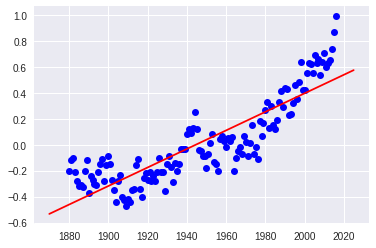

In [0]:
# Part 2B: Line of best fit



# Formulate A and b, then solve the least squares problem
all_ones = np.ones([137, 1])
#year_2 = np.power(year, 2)
A = np.column_stack((all_ones, year))
b = temp
x = (A.T * A).I * A.T * b
e_3 = (np.linalg.norm(A*x - b)) ** 2
print (x)
print (e_3)


# PLEASE UPDATE the value of c_0 and c_1 below based on the solution you obtained

#  These current values below are just placeholders.
#  As you change the values of c_0 and c_1, the line plotted below also changes.
c_0 = x[0,0] # y-intercept 
c_1 = x[1,0] # slope



# Do not modify the code below the line 
#-------------------------------------------------------
# Visualizing the data and the regression line
X = [1, 2, 3, 4]
Y = [2, 4, 5, 6]
t = np.arange(1870, 2025, 0.1)
Y_line = c_1 * t + c_0
plt.plot( year, temp, 'bo' )
plt.plot( t, Y_line, 'r' )
plt.show( )

#### Part 2C: Interpretation

Please comment on the best fit line that you found in Part 2B:
+ Does the line you found fit the data relatively well?
+ Do you think that global temperature has indeed change linearly with time?  That is, do you think that a line accurately describes how global temperature changes with respect to time?  Should we have fitted some other type of curve?

This line as shown on the graph doesn't show the data well because it barely passes through any points or predict the value of the temperature, and it yields a relatively high error - 3.59. I don't think that global temperature has indeed changed linearly with time, because the data points show a shape of a curve. May be after modifying the x values, we can try fitting polynomial curve or exponential curve to see what happens. 


### Part Three: Multivariate Linear Regression

Sometimes, we are interested in seeing how several input variables ($x_1, x_2, \ldots, x_n$) are related to the value of an output variable ($y$).

For example:
+ We might be interested in examining how crime rate ($y$) in a community is related to median income ($x_1$) and unemployment rate ($x_2$) in that community.
+ We might be interested in examining how popular a social media post is (let's say $y$ = number of retweets) as a function of the length of the post ($x_1$), the number of followers of that account ($x_2$), the frequency of positive-sentiment words used on that post ($x_3$), and the frequency of negative-sentiment words used on that post ($x_4$).


Below is a small dataset with two input variables ($x_1, x_2$) and one output variable ($y$) that we will work with.

<table>
  <tr>
    <th>$x_1$</th>
    <th>$x_2$</th>
    <th>$y$</th>
  </tr>
  <tr>
    <td>3</td>
    <td>2</td>
    <td>5</td>
  </tr>
  <tr>
    <td>-1</td>
    <td>-2</td>
    <td>0</td>
  </tr>
  <tr>
    <td>-2</td>
    <td>5</td>
    <td>7</td>
  </tr>
  <tr>
    <td>4</td>
    <td>-5</td>
    <td>3</td>
  </tr>
  <tr>
    <td>-5</td>
    <td>1</td>
    <td>-2</td>
  </tr>
</table>





**Your Tasks**
+ **Part 3A: Plane of best fit**

   Find the coefficients $c_1$ and $c_2$ for the plane $y = c_1 x_1 + c_2 x_2$ that best fits the small dataset above
  
+ **Part 3B: Interpretation**

    Interpret your results


[[2.6086262 ]
 [0.87300319]
 [0.8298722 ]]


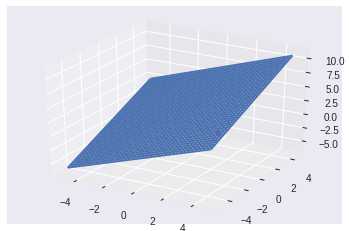

In [0]:
# Part 3: Multivariate Linear Regression



# Formulate A and b, then solve the least squares problem

A = np.matrix([[1,3,2],[1,-1,-2],[1,-2,5],[1,4,-5],[1,-5,1]])
b = np.matrix([[5],[0],[7],[3],[-2]])
x = x = (A.T * A).I * A.T * b
print (x)


# PLEASE UPDATE the value of c_0 and c_1 below based on the solution you obtained

#  These current values below are just placeholders.
#  As you change the values of c_0 and c_1, the line plotted below also changes.
c_0 = x[0,0] # the constant term
c_1 = x[1,0] # the coefficient for the x_1 term
c_2 = x[2,0] # the coefficient for the x_2 term


# Do not modify the code below the line 
#-------------------------------------------------------
# Visualizing the data and the regression line
fig = plt.figure()
ax = fig.gca(projection='3d')

# plot points
points = ax.scatter([1, 2, 3], [0, 3, -1], [4, 2, 1], c = 'r')

# plot the surface
X_1 = np.arange(-5, 5, 0.25)
X_2 = np.arange(-5, 5, 0.25)
X_1, X_2 = np.meshgrid(X_1, X_2)
X_3 = c_0 + c_1 * X_1 + c_2 * X_2
surf = ax.plot_wireframe(X_1, X_2, X_3)


plt.show()

The plane with the equation y = 2.61 + 0.87x_1 + 0.83x_2 best fits the small given dataset. And since the coefficients of two independent variables are positive, y value increases as x_1 and x_2 increase.


## Reflections

Please briefly write:
1. One new thing that you learn from this project
2. One aspect of this project that you found most interesting OR most challenging OR both.
3. If you discuss any part of the project with anyone ( classmate(s), tutor(s), etc.), please ackowledge them here.

1. New things I learned from this project include getting the concept of doing multivariate linear regression.  Also, technicalwise, how to type out a matrix more smartly

2. One aspect that I found to be interesting is that in Part 2: we are modeling the relationship between time and the global temperature, and we are using the year as the independent variable. However, I'm wondering whether the number of year itself should be incorporated into the equation, because numbers such as "1880", "2000" does not seem to be related numerically with the temperature. (Also, when I try to fit the data with a polynomial equation, the curve becomes really off from the data point.)Therefore, I'm thinking about should we instead use numbers that represent a period of time? For example starting from 1880, t = 0, and then in 2000, t = 120. 